# Titanic Data Analysis

### Data Science Fundamentals I - Udacity

_The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships._

_One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class._


-- Taken from _Kaggle_

**The following data analysis is part of the Udacity Fundamentals of Data Science I course completion project.**

**The goal of this project is to analyze the demographics and information of 891 of the 2224 passengers and crew aboard the Titanic and then raise questions and answers. For this, a dataset from the site _Kaggle_. was used.**

### Support links:
- https://seaborn.pydata.org/tutorial/categorical.html
- https://classroom.udacity.com/nanodegrees/nd110
- https://www.kaggle.com/c/titanic

## Environment preparation and quick data visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# opening the file and assigning it to a df variable
df = pd.read_csv('titanic-data-6.csv')

In [2]:
df.head() # returns the first rows of the dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Dictionary

**Let's copy the information into a table, to help the analysis in the notebook:**


| Variable        | Definition           | Key  |
| ------------- |:-------------:| -----:|
| survival      | Survival | 0 = No, 1 = Yes |
| pclass      | Ticket class      |   1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex      |   |
| Age      | Age in years |  |
| sibsp      | # of siblings / spouses aboard the Titanic      |    |
| parch | # of parents / children aboard the Titanic	      |    |
| ticket      | Ticket number |  |
| fare      | Passenger fare      |    |
| cabin      | Cabin number      |    |
| embarked | Port of Embarkation      |    C = Cherbourg, Q = Queenstown, S = Southampton |



In [3]:
df.shape # returns the number of rows and columns of the dataframe

(891, 12)

In [4]:
df.info() # returns the amount and types of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Step 1: Asking questions

### Questions brainstorming

I believe we have a more general goal, which we call "_Exploratory_", with an open profile, which will seek to see patterns of the people who survived.

In addition to that, I will explore 3 other questions. They are:

- **Exploratory Question**: What were the factors that made some people more likely to survive?
     - **Question #1**: Was there a preference for saving people from First Class?
     - **Question #2**: Did younger and/or older people had priority in the lifeboats?
     - **Question #3**: Did women really had priority on the lifeboats?

# Step 2: Preparing Data

First, let's keep everything lowercase to make the code easier, **creating a function**:

In [5]:
"""
       Function to leave lowercase characters.
       Arguments:
           data: The dataframe to be used.
       Returns:
           Dataframe columns with lowercase characters.

       """

def lower_col(data): 
    new_labels = [] # create an empty list
    for col in df.columns:
        new_labels.append(col.lower())  # append to list the dataframe columns with lowercase characters
    df.columns = new_labels # transforms list into dataframe columns

lower_col(df) # call the function


And turn the _'passengerid'_ into **index**, to make the code easier:

In [6]:
df.index = df['passengerid'] # create the passengerid index
df.drop('passengerid', axis=1, inplace=True) # clear the passengerid column


Confirming:

In [7]:
df.head() # returns the first rows of the dataframe

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
passengerid,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now let's see how many **non-null values** there are in our dataframe:

In [8]:
df.info() # returns the amount and types of data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Apparently we have 3 items with missing data: **cabin, embarked and age**.
- The 'cabin' item has the majority of blank data. As it will not be used to answer my questions, I will delete the column. I will also eliminate the 'ticket' column, which is useless for now.
- The 'age' column has 177 missing items. Around 20% of the total data. Let's solve it by assigning the average of the age data we have to the missing items.
- The 'embarked' item has only 2 blank items. The best thing to do is to eliminate the lines it contains, as it doesn't make sense to average a str.

In [9]:
# delete column 'cabin' and 'ticket'
df.drop(['cabin', 'ticket'], axis=1, inplace=True)

In [10]:
# assigns an average to blank 'age' items.
mean = df['age'].mean()
df['age'].fillna(mean, inplace=True)

In [11]:
# eliminates lines with blank 'embarked' items.
df = df.dropna(how='any',axis=0) 

Confirming the changes:

In [12]:
df.info() # returns the amount and types of data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  889 non-null    int64  
 1   pclass    889 non-null    int64  
 2   name      889 non-null    object 
 3   sex       889 non-null    object 
 4   age       889 non-null    float64
 5   sibsp     889 non-null    int64  
 6   parch     889 non-null    int64  
 7   fare      889 non-null    float64
 8   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


Now, let's see how much **duplicate data** we have in our dataframe:

In [13]:
# returns a sum of duplicate values
sum(df.duplicated())

0

Great, no duplicate data. It remains for us to verify that the dtypes of the values are correct.

In [14]:
df.info() # returns the amount and types of data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  889 non-null    int64  
 1   pclass    889 non-null    int64  
 2   name      889 non-null    object 
 3   sex       889 non-null    object 
 4   age       889 non-null    float64
 5   sibsp     889 non-null    int64  
 6   parch     889 non-null    int64  
 7   fare      889 non-null    float64
 8   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


The data in the _'age'_ column does not need to be a **float**. Let's make it **integer**:

In [15]:
df.age = df.age.astype(int) # transform data type to int

Confirming the changes:

In [16]:
df.info() # returns the amount and types of data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  889 non-null    int64  
 1   pclass    889 non-null    int64  
 2   name      889 non-null    object 
 3   sex       889 non-null    object 
 4   age       889 non-null    int32  
 5   sibsp     889 non-null    int64  
 6   parch     889 non-null    int64  
 7   fare      889 non-null    float64
 8   embarked  889 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(3)
memory usage: 66.0+ KB


Sorted out.

Let's now go to the Data Exploration step.

# Step 3: Explore the data

Now let's take a general look at the sample to identify if there is anything odd and give us some idea of what we can explore.


This will be useful for the Exploratory Question.

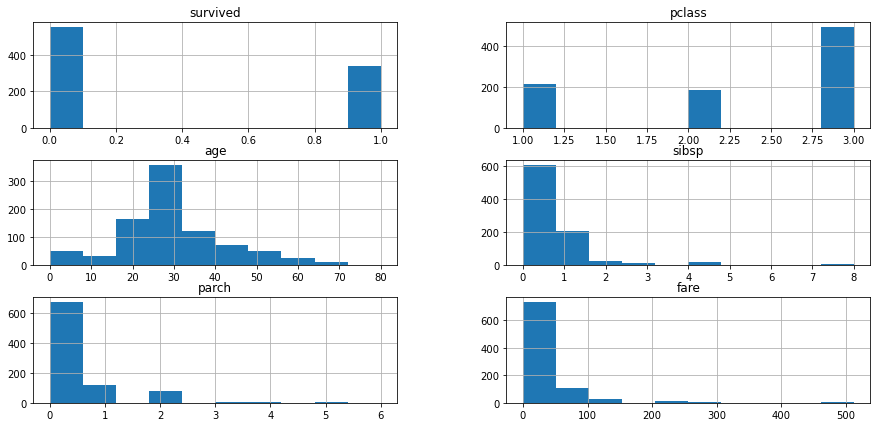

In [17]:
df.hist(figsize=(15,7)); # returns histograms of available numeric data

We will now take a panoramic view of the relationship between the data.
This will also be useful for the Exploratory Question:

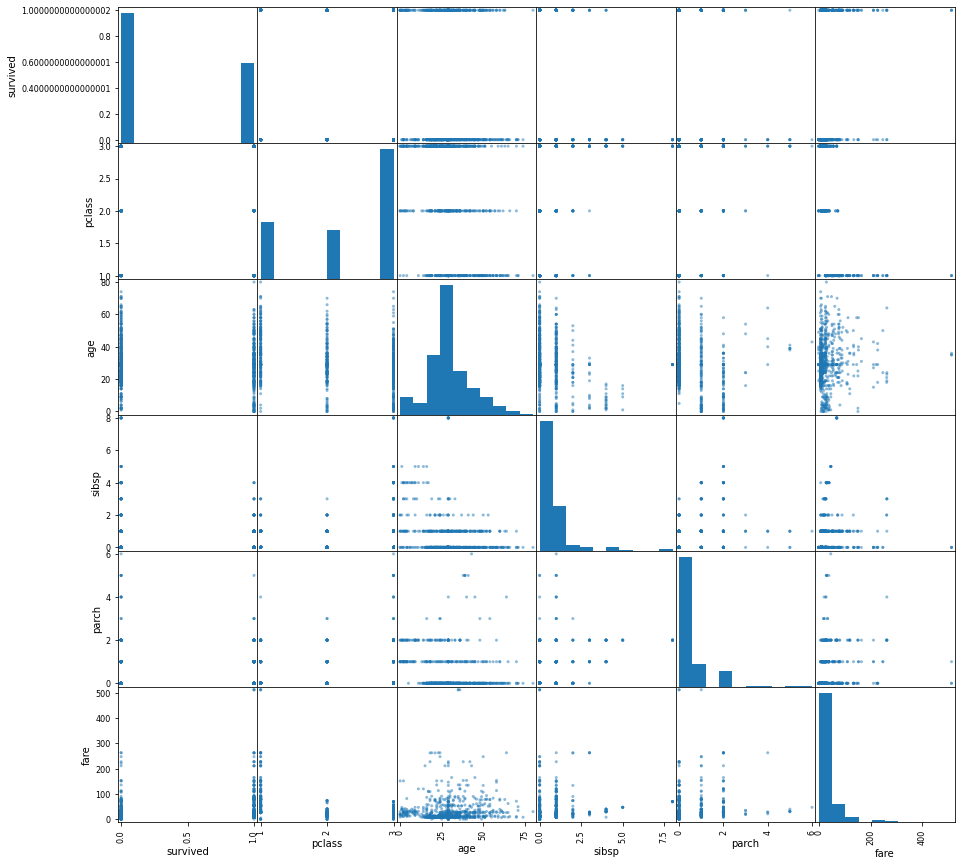

In [18]:
# returns a scatter-type matrix relating the columns with numeric data to each other
pd.plotting.scatter_matrix(df, figsize=(15,15));

### Some initial conclusions we can draw:

- Less than 40% of passengers survived the tragedy.
- Most of the people who paid more were because they were accompanied other people (similarity of the 'fare' graph with the 'parch' and 'sibsp' graphs).
- Most of the passengers were 3rd class.

**These conclusions are still superficial. Let's explore a little more:**

Let's identify the number of people who boarded according to the ports:

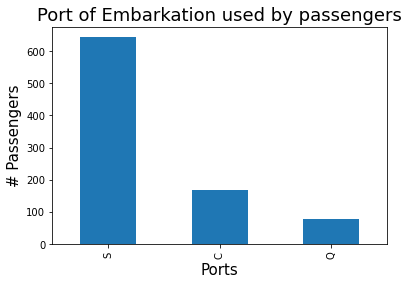

In [19]:
df['embarked'].value_counts().plot(kind='bar'); # return bar graph of 'embarked' column 
plt.title('Port of Embarkation used by passengers', fontsize=18) # defines the title
plt.xlabel("Ports", fontsize=15) # set x-axis labels
plt.ylabel("# Passengers", fontsize=15); # set y-axis labels


It appears that most passengers boarded at Southampton.

Let's have a better view of the slice of people who survived/died in the accident:

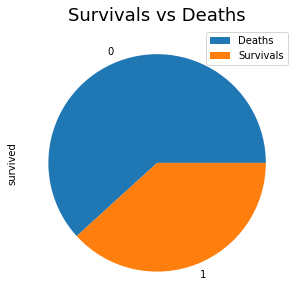

In [20]:
df['survived'].value_counts().plot(kind='pie', figsize=(5,5)); # returns pie chart of column survived'
plt.title('Survivals vs Deaths', fontsize=18) # defines the title
plt.legend(['Deaths', 'Survivals'], loc='upper right'); # set labels location

Now let's group with _groupby_ to better understand the relationship of survivors and their class:

In [21]:
df.groupby(['survived', 'pclass'])['age'].count() # returns samples subgrouped by columns 'survived' and 'pclass'

survived  pclass
0         1          80
          2          97
          3         372
1         1         134
          2          87
          3         119
Name: age, dtype: int64

It seems that there was a preference for first class passengers.
**This will be useful for question 1.**

Let's explore the correlation of survivors with mean, minimum, maximum age and percentages.
**This will be useful for question 2.**

In [22]:
# returns numeric information comparing 'survived' and 'age' columns
df.groupby('survived')['age'].describe() 

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,549.0,30.240437,12.463835,1.0,23.0,29.0,35.0,74.0
1,340.0,28.300000,13.705865,0.0,21.0,29.0,35.0,80.0


Let's now create subgroups to analyze separately the groups that survived and died:

In [23]:
df_1 = df.query('survived == "1"')# assigns the group of surviving people to variable 'df_1'
df_0 = df.query('survived == "0"') # assigns the group of people who died to variable 'df_0'

Let's get an idea of the distribution of **survivors** by age and how much their 'fare' was.
**This can be useful for question 1 or 2.**

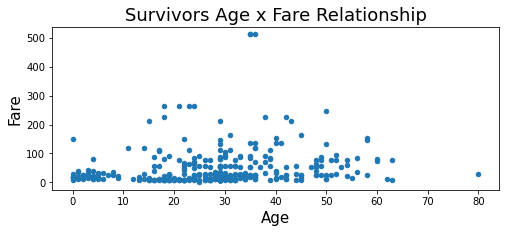

In [24]:
# returns scatter plot correlating 'fare' and 'age' columns of people who survived
df_1.plot(x='age', y='fare', kind='scatter', figsize=(8,3));

plt.title('Survivors Age x Fare Relationship', fontsize=18) # defines the title
plt.xlabel("Age", fontsize=15) # set x-axis labels
plt.ylabel("Fare", fontsize=15); # set y-axis labels

And now, an idea of the distribution of the **deads** by age and how much their _'fare'_ was.
**This can be useful for question 1 or 2.**

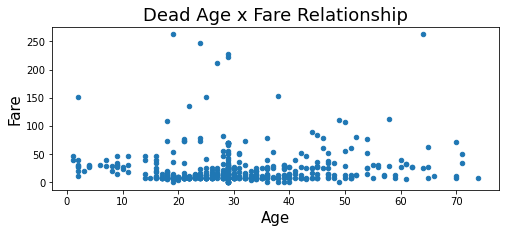

In [25]:
# returns scatter plot correlating 'fare' and 'age' columns of people who died
df_0.plot(x='age', y='fare', kind='scatter', figsize=(8,3));

plt.title('Dead Age x Fare Relationship', fontsize=18) # defines the title
plt.xlabel("Age", fontsize=15) # set x-axis labels
plt.ylabel("Fare", fontsize=15); # set y-axis labels

Finally, an analysis of gender in relation to survival propensity.
**This will be useful for question 3.**

In [26]:
# returns samples subgrouped by 'survived' and 'sex' columns
df.groupby(['survived', 'sex'])['pclass'].count()

survived  sex   
0         female     81
          male      468
1         female    231
          male      109
Name: pclass, dtype: int64

# Step 4: Make Conclusions

## Limitations:

- The column 'cabin' was eliminated as it had 77% of the data blank and was not useful in answering the questions;
- The 'ticket' column was also eliminated for not being useful in answering the questions;
- The 'age' column had 177 rows assigned an average of the other 80%, for not having data.
- Two lines have been deleted, as they contain the 'embarked' null values.

## Refining the conclusions:

- The average age of survivors was 28 years.
- The average age of the dead was 30 years.
- Only 38% of passengers survived the accident.
- Most of the crew were 3rd class, but only 24% of 3rd class passengers survived, while 47% were saved in 2nd class and 63% of 1st class.
- The largest proportion of survivors were women (68%).

**Apparently, some variables influenced the passengers' propensity to survive ("Exploratory Question"), namely:**

- Question #1: Class
- Question #2: Age
- Question #3: Gender

**To help conclude _these statements above_, let's make comparative graphs relating them to people who survived or died:**

**Question 1 - Confirmation** Was there a preference for saving First Class people?

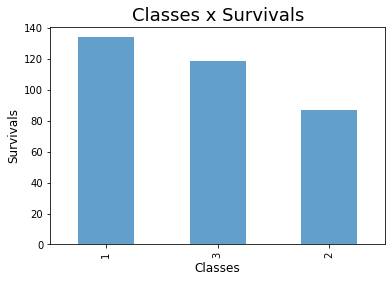

In [27]:
df_1['pclass'].value_counts().plot(kind='bar', alpha=.7) # creates bar chart with samples from column 'pclass'
plt.title('Classes x Survivals', fontsize=18)
plt.xlabel("Classes", fontsize=12) # set x-axis labels
plt.ylabel("Survivals", fontsize=12); # set y-axis labels

**Conclusion of Question 1:** Apparently there was a preference for saving first class people. Let's improve the graphic in the communication step.

**Question 2 confirmation:** Did younger and/or older people had priority on the lifeboats?

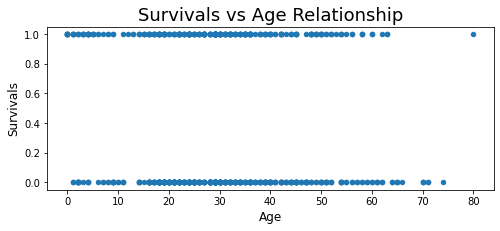

In [28]:
# returns scatter plot of samples correlating age and whether they survived or died
df.plot(x='age', y='survived', kind='scatter', figsize=(8,3));
plt.title('Survivals vs Age Relationship', fontsize=18) # defines the title
plt.xlabel("Age", fontsize=12) # set x-axis labels
plt.ylabel("Survivals", fontsize=12); # set y-axis labels

**Conclusion of Question 2:** Apparently the ages "extremities" have survived. Let's improve the graphic in the communication step.

**Confirmation of Question 3:** Did women really had priority on lifeboats?

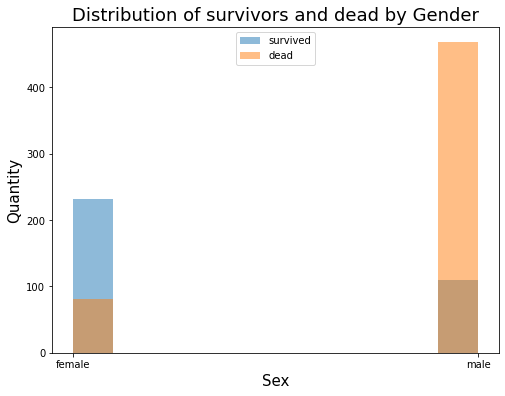

In [29]:
fig, ax = plt.subplots(figsize=(8,6)) # calls matplotlib to create the graph
ax.hist(df_1['sex'], alpha=0.5, label='survived') # set 'sex' column in survivor group and histogram 1 labels
ax.hist(df_0['sex'], alpha=0.5, label='dead') # set 'sex' column in dead group and histogram 2 labels
ax.set_title('Distribution of survivors and dead by Gender', fontsize=18) # defines the title
ax.set_xlabel('Sex', fontsize=15) # set x-axis labels
ax.set_ylabel('Quantity', fontsize=15) # set y-axis labels
ax.legend(loc='upper center') # define local da legenda
plt.show() # returns the graph

**Conclusion of Question 3:** More women were saved than died. We will also improve this graphic in the communication step.

# Step 5: Communicate

## Question #1 - Was there a preference for saving First Class people?

### It is visible that most of the survivors were from First Class onwards:

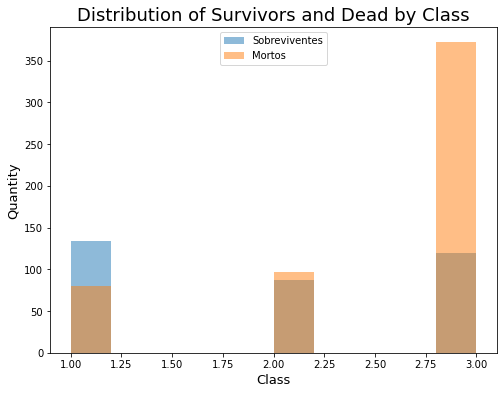

In [30]:
fig, ax = plt.subplots(figsize=(8,6)) # calls matplotlib to create the graph
ax.hist(df_1['pclass'], alpha=0.5, label='Sobreviventes') # set 'pclass' in survivor group and histogram 1 labels
ax.hist(df_0['pclass'], alpha=0.5, label='Mortos') # set 'pclass' column in dead group and histogram 2 labels
ax.set_title('Distribution of Survivors and Dead by Class', fontsize=18) # defines the title
ax.set_xlabel('Class', fontsize=13) # set x-axis labels
ax.set_ylabel('Quantity', fontsize=13) # set y-axis labels
ax.legend(loc='upper center', fontsize=10) # sets labels location
plt.show() # returns the graph

### Third Class represented more than 50% of the dead.

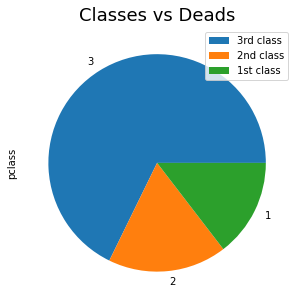

In [31]:
# returns pie chart of classes in group of people who died and sets title
df_0['pclass'].value_counts().plot(kind='pie', figsize=(5,5), label=None);
plt.title("Classes vs Deads", fontsize=18)
plt.legend(['3rd class', '2nd class', '1st class'], loc='upper right'); # set labels location

## Question #2 - Did younger and/or older people had priority on the lifeboats?

### Younger and older people had preference.

### While most of the dead were between 20 and 30 years old.

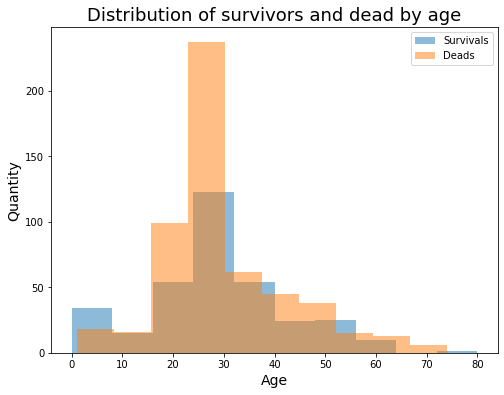

In [32]:
fig, ax = plt.subplots(figsize=(8,6)) # calls matplotlib to create the graph
ax.hist(df_1['age'], alpha=0.5, label='Survivals') # set 'age' column in dead group and histogram 1 labels
ax.hist(df_0['age'], alpha=0.5, label='Deads') # sets 'age' column sample in the dead group and histogram 2 labels
ax.set_title('Distribution of survivors and dead by age', fontsize=18) # defines the title
ax.set_xlabel('Age', fontsize=14) # set x-axis labels
ax.set_ylabel('Quantity', fontsize=14) # set y-axis labels
ax.legend(loc='upper right') # set labels location
plt.show() # return the graph

## Question #3 - Did women really had priority on lifeboats?

### Comparing the proportion of survivors by sex, we see that women were more likely to survive:

In [33]:
survived_counts = df.groupby(['survived', 'sex']).count()['pclass'] # create variable getting counts for each sex and survival
survived_totals = df.groupby('survived').count()['pclass'] # create variable with total counts of survivors and dead
dead_proportions = survived_counts[0] / survived_totals[0] # creates variable to assign proportion of dead to total
alive_proportions = survived_counts[1] / survived_totals[1] # create variable to assign proportion of survivors to total


In [34]:
ind = np.arange(len(alive_proportions))  # the x-axis location of the groups
width = 0.35      # the width of the bars

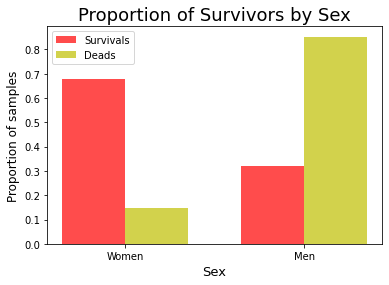

In [35]:
# tracing the bars
alive_bars = plt.bar(ind, alive_proportions, width, color='r', alpha=.7, label='Survivals')
dead_bars = plt.bar(ind + width, dead_proportions, width, color='y', alpha=.7, label='Deads')

# title and labels
plt.ylabel('Proportion of samples', fontsize=12)
plt.xlabel('Sex', fontsize=13)
plt.title('Proportion of Survivors by Sex', fontsize=18)
locations = ind + width / 2  # location of markers on x-axis
labels = ['Women', 'Men']  # location of markers on x-axis
plt.xticks(locations, labels)

# labels
plt.legend();